In [83]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def checkDFValidity(df):
  d1 = df.shape[0]
  d2 = df['SOPInstanceUID'].unique().shape[0]
  assert(d1 == d2)

clinical_df = pd.read_csv('CD9.tsv', sep='\t')
ct_df = pd.read_csv('CT.csv', sep='\t', low_memory=False)
pt_df = pd.read_csv('PT.csv', sep='\t', low_memory=False)
compositeContext_df=pd.read_csv('CompositeContext.csv', sep='\t')
#df["Biopsy_DateOfProcedure"] = pd.datetime(df["Biopsy_DateOfProcedure"])
#pd.to_datetime(df.Biopsy_DateOfProcedure)

In [84]:

checkDFValidity(ct_df)
checkDFValidity(pt_df)
#checkDFValidity(clinical_df)
checkDFValidity(compositeContext_df)

In [85]:
#clinical_df.set_index('SOPInstanceUID',inplace=True)
#ct_df.set_index('SOPInstanceUID',inplace=True)
#pt_df.set_index('SOPInstanceUID',inplace=True)
#compositeContext_df.set_index('SOPInstanceUID',inplace=True)


In [86]:
pt_df.columns

Index(['Columns', 'ConvolutionKernel', 'FrameOfReferenceUID',
       'ImageOrientationPatient', 'ImagePositionPatient', 'PixelSpacing',
       'ReconstructionMethod', 'Rows', 'SOPInstanceUID', 'SliceThickness'],
      dtype='object')

In [87]:
ct_df=pd.merge(ct_df,compositeContext_df,on="SOPInstanceUID")

In [88]:
pt_df=pd.merge(pt_df,compositeContext_df,on="SOPInstanceUID")

In [89]:
ct_df.columns

Index(['Columns', 'ConvolutionKernel', 'DistanceSourceToDetector',
       'DistanceSourceToPatient', 'Exposure', 'ExposureTime', 'FilterType',
       'FocalSpots', 'FrameOfReferenceUID', 'GeneratorPower',
       'ImageOrientationPatient', 'ImagePositionPatient', 'PixelSpacing',
       'ReconstructionDiameter', 'RotationDirection', 'Rows', 'SOPInstanceUID',
       'SliceThickness', 'XRayTubeCurrent', 'BodyPartExamined',
       'ManufacturerModelName', 'Modality', 'PatientAge', 'PatientID',
       'PatientName', 'PatientSex', 'PatientWeight', 'SOPClassUID',
       'SeriesDate', 'SeriesDescription', 'SeriesInstanceUID', 'SeriesTime',
       'SoftwareVersions', 'StudyDate', 'StudyDescription', 'StudyTime'],
      dtype='object')

In [90]:
ct_df['SeriesInstanceUID'].unique().shape  

(487,)

In [91]:
pt_df['SeriesInstanceUID'].unique().shape  

(484,)

In [92]:
import geometryChecker, imp
imp.reload(geometryChecker)
totalCTfailures = 0
ctChecks_df = pd.DataFrame(columns=["SeriesInstanceUID","computedSliceThickness","SliceThickness","geometryOK"])
locCnt = 0
seriesUIDs = pd.unique(ct_df["SeriesInstanceUID"])
for seriesUID in seriesUIDs:
  series = ct_df[ct_df["SeriesInstanceUID"]==seriesUID]
  checker = geometryChecker.SeriesGeometryChecker(series)
  geometryOK = checker.geometryOK()
  ctChecks_df.loc[locCnt] = [seriesUID,checker.computedSliceThickness,series["SliceThickness"].iloc[0],geometryOK]
  locCnt = locCnt+1
  if not geometryOK:
    # print("Problem for series "+seriesUID+" patient "+series["PatientID"].iloc[0]+" date "+str(series["StudyDate"].iloc[0])+" total instances "+str(series.shape[0]))
    totalCTfailures = totalCTfailures+1
  
print("Total geometrically inconsistent series:"+str(totalCTfailures)+" out of "+str(seriesUIDs.shape[0]))


Total geometrically inconsistent series:26 out of 487


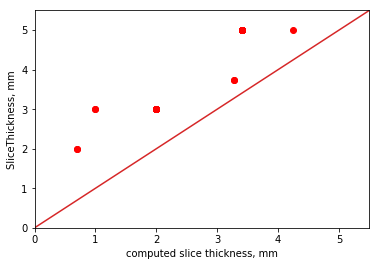

In [93]:
import matplotlib.pyplot as plt
validSeries=ctChecks_df[ctChecks_df["geometryOK"]==True]
plt.plot(ctChecks_df["computedSliceThickness"], ctChecks_df["SliceThickness"],'ro')
plt.plot(np.linspace(0,5.5),np.linspace(0,5.5))
plt.axis([0,5.5,0,5.5])
plt.xlabel('computed slice thickness, mm')
plt.ylabel('SliceThickness, mm')
plt.show()

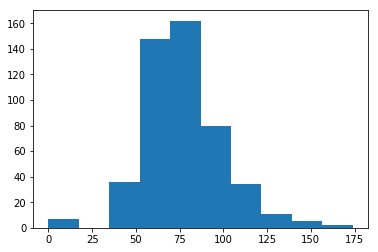

In [94]:
ct_df_noDuplicates = ct_df.drop_duplicates(subset="SeriesInstanceUID")
ct_df_noDuplicates["PatientWeight"].describe()

vals = [v for v in ct_df_noDuplicates["PatientWeight"].values if not np.isnan(v)]
plt.hist(vals)
plt.show()

In [95]:
vals = [v for v in ct_df_noDuplicates["RotationDirection"].values if not np.isnan(v)]
plt.hist(vals)
plt.show()

TypeError: ufunc 'isnan' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''